|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2



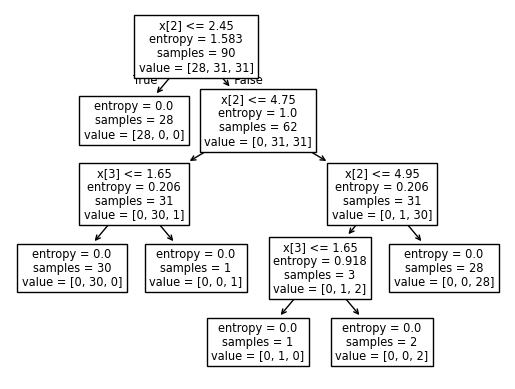

[[22  0  0]
 [ 0 16  3]
 [ 0  0 19]]
Accuracy rate = 0.95


In [ ]:
# 利用 Decision Tree 非線性模型來區分資料


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score
import matplotlib.pyplot as plt


# 1. 先建立訓練及測試資料集

iris = load_iris()

x = iris["data"]
y = iris["target"]

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.4)


# 2. 進行模型訓練

# 決策樹基本上就是用所有特徵做出不同條件去測試哪個特徵的條件可以有最大訊息增益

# 也就是各個篩選條件節點產生的分類結果能得到最低不確定性的商

# 模型還可以調 max_depth ( 最多幾層 )，節點要分出左右路徑的最少樣本數 min_sample_split ( 本身的樣本，太少就不分，避免過擬合 )

model = DecisionTreeClassifier(criterion="entropy")

model.fit(x_train,y_train)


# 3. 產出模型結果

# 文字的模型敘述，比較不直覺

report = export_text(model,feature_names=iris["feature_names"])

print(report)

# 畫圖的模型呈現

tree.plot_tree(model)

plt.show()


# 4. 衡量模型的準確度

# 先算出 y_prediction

y_prediction = model.predict(x_test)

# 再做出 confusion matrix

matrix = confusion_matrix(y_test,y_prediction)

print(matrix)

# 算出 Accuracy rate , Precision rate 及 Recall rate

a = accuracy_score(y_test,y_prediction)

# p = precision_score(y_test,y_prediction)

# r = recall_score(y_test,y_prediction)

print(f"Accuracy rate = {round(a,ndigits=2)}")

# print(f"Precisoin rate = {p}")

# print(f"Recall rate = {r}")

